# Data Augmentation

Techniques :

- Random Rotation
- Random Horizontal Flip
- Random Scale
- Random Crop
- Random Brightness/Contrast Adjustment
- Random Gaussian Blur
- Random Noise Addition
- Random Elastic Transformation


## Import Stuffs

In [50]:
import numpy as np
from PIL import Image
import cv2
from scipy.ndimage import gaussian_filter, map_coordinates
import matplotlib.pyplot as plt

## Random Rotation

In [159]:
def random_rotation(image, angle_range, interpolation = cv2.INTER_LINEAR, random_seed=42):
    np.random.seed(random_seed)
    
    # Randomly select rotation angle within the specified range
    angle = np.random.uniform(angle_range[0], angle_range[1])
    
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Calculate rotation matrix
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Apply rotation to image
    image_rotated = cv2.warpAffine(image, rotation_matrix, (width, height), interpolation)
    
    return image_rotated

## Random Horizontal Flip

In [140]:
def random_horizontal_flip(image, random_seed = 42):
    # Randomly decide whether to flip the image horizontally

    np.random.seed(random_seed)
    
    flip = np.random.choice([True, False])

    # Flip image and mask horizontally if chosen
    if flip:
        image_flipped = cv2.flip(image, 1)
    else:
        image_flipped = image.copy()

    return image_flipped

## Random Verticle Flip

In [142]:
def random_verticle_flip(image, random_seed = 42):
    # Randomly decide whether to flip the image horizontally

    np.random.seed(random_seed)
    flip = np.random.choice([True, False])

    # Flip image and mask horizontally if chosen
    if flip:
        image_flipped = cv2.flip(image, 0)
    else:
        image_flipped = image.copy()

    return image_flipped

## Random Scale

In [167]:
def random_scale(image, scale_range, interpolation = cv2.INTER_LINEAR, random_seed = 42):

    #set random seed
    np.random.seed(random_seed)

    # Randomly select scale factor within the specified range
    scale_factor = np.random.uniform(scale_range[0], scale_range[1])
    print(scale_factor)
    # Calculate the new size based on the scale factor
    height, width = image.shape[:2]
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    new_size = (new_width, new_height)
    print(new_size)
    # Apply scaling to image and mask
    image_scaled = cv2.resize(image, new_size, interpolation=interpolation)

    # Convert back to numpy arrays
    image_scaled = np.array(image_scaled)
    print(image_scaled.shape)
    return image_scaled

## Random Crop

In [170]:
def random_crop(image, crop_size, random_seed = 42):

    # Get the dimensions of the image and mask
    image_height, image_width = image.shape[:2]
    np.random.seed(random_seed)
    # Randomly select the top-left corner of the crop
    top = np.random.randint(0, image_height - crop_size[0] + 1)
    left = np.random.randint(0, image_width - crop_size[1] + 1)

    # Calculate the bottom-right corner of the crop
    bottom = top + crop_size[0]
    right = left + crop_size[1]

    # Crop image and mask
    image_cropped = image[top:bottom, left:right]

    return image_cropped

## Random Brightness and Contrast Adjustment and 

In [49]:
def random_brightness_contrast(image, brightness_range, contrast_range, random_seed=42):

    np.random.seed(random_seed)
    
    # Randomly select brightness and contrast factors within the specified ranges
    brightness_factor = np.random.uniform(brightness_range[0], brightness_range[1])
    contrast_factor = np.random.uniform(contrast_range[0], contrast_range[1])

    # Apply brightness and contrast adjustment using OpenCV
    adjusted_image = cv2.convertScaleAbs(image, alpha=contrast_factor, beta=brightness_factor)

    return adjusted_image

## Random Gaussian Blur

In [44]:
def random_noise(image, noise_range):
    # Generate random noise with the same shape as the image
    noise = np.random.uniform(noise_range[0], noise_range[1], size=image.shape).astype(image.dtype)

    # Add noise to the image
    noisy_image = np.clip(image + noise, 0, 255)

    return noisy_image

## Random Elastic Transformation

In [181]:


def random_elastic_transform(image, alpha_range, sigma_range):
    
    # Randomly select alpha and sigma values within the specified ranges
    alpha = np.random.uniform(alpha_range[0], alpha_range[1])
    sigma = np.random.uniform(sigma_range[0], sigma_range[1])

    # Generate random displacement fields
    random_state = np.random.RandomState(None)
    shape = image.shape[:2]
    displacement_x = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="reflect") * alpha
    displacement_y = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="reflect") * alpha

    # Create grid of coordinates
    grid_x, grid_y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = grid_x + displacement_x, grid_y + displacement_y

    # Map the image and mask using the displacement fields
    transformed_image = map_coordinates(image, indices, order=1, mode="reflect").reshape(image.shape)

    return transformed_image

## Test

In [78]:
path = "hand14k/Images/OP01-R01-PastaSalad_000020.jpg"



In [136]:
def display_image(image_arrays, labels, title_color = 'red'):
    
    n = len(image_arrays)
    plt.figure(figsize=(10, 10))
    for i, (img_arr, label) in enumerate(zip(image_arrays, labels), 1):
        
        ax = plt.subplot(n, n, i)
        ax.imshow(img_arr)
        ax.set_title(label, color=title_color)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


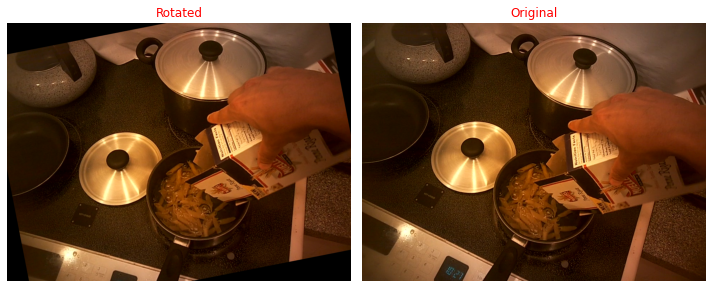

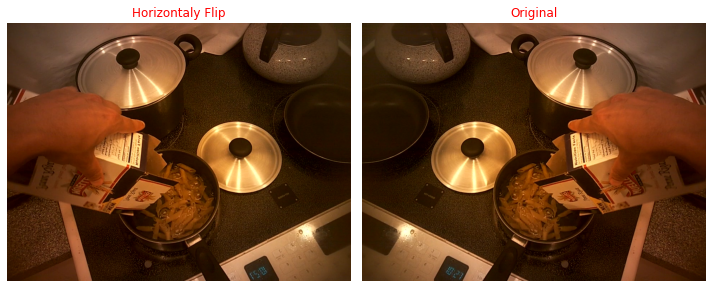

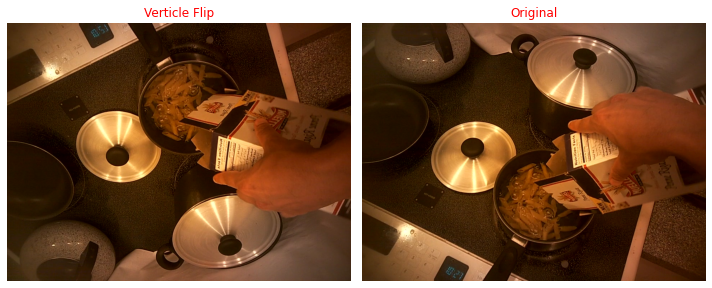

1.749080237694725
(1679, 1259)
(1259, 1679, 3)


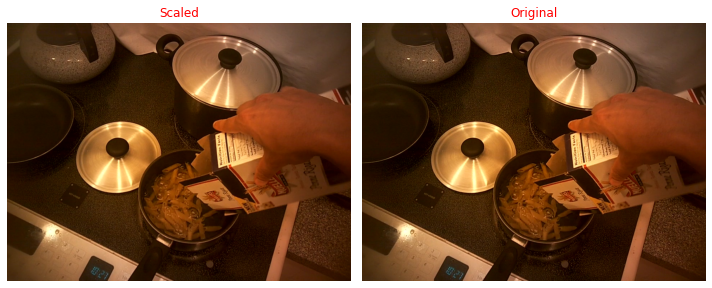

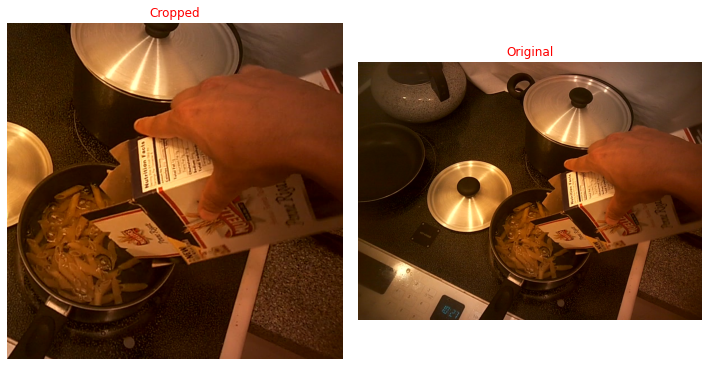

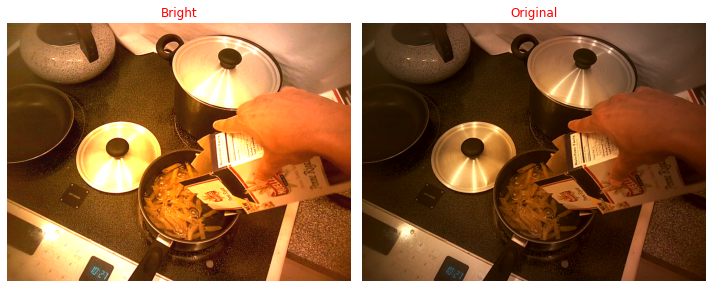

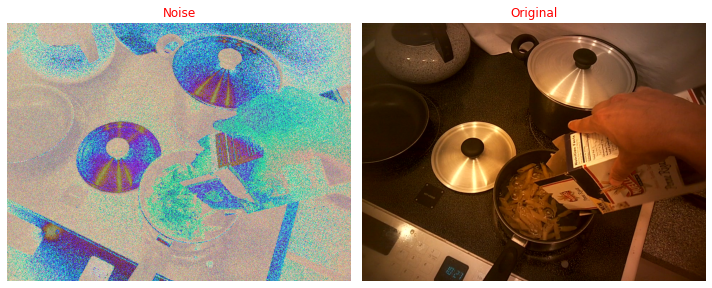

RuntimeError: invalid shape for coordinate array

In [182]:
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


display_image([random_rotation(image, [10, 13]), image], ["Rotated", "Original"])
display_image([random_horizontal_flip(image, random_seed=2), image], ["Horizontaly Flip", "Original"])
display_image([random_verticle_flip(image, random_seed=2), image], ["Verticle Flip", "Original"])
display_image([random_scale(image, [1, 3]), image], ["Scaled", "Original"])
display_image([random_crop(image, [600,600]), image], ["Cropped", "Original"])
display_image([random_brightness_contrast(image, [6,10], [1, 2]), image], ["Bright", "Original"])
display_image([random_noise(image, [100,200]), image], ["Noise", "Original"])
display_image([random_elastic_transform(image, [100,200], [10, 20]), image], ["Elastic deformation", "Original"])

In [89]:
image.dtype

dtype('uint8')